<center>
    <h1> Scientific Programming in Python  </h1>
    <h2> Topic 3: Handling Very Large Arrays, Memory Mappings </h2> 
</center>

_Notebook created by Martín Villanueva - `martin.villanueva@usm.cl` - DI UTFSM - April 2017._

In [1]:
%load_ext memory_profiler

import numpy as np
import matplotlib.pyplot as plt
import h5py

def image_plot(img):
    """
    img is an (nx,ny,3) numpy.array
    """
    plt.figure(figsize=(12,12))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Para esta actividad trabajaremos con la siguiente imagen astronómica:

In [2]:
img = plt.imread('heic1608b.jpg', format='jpeg')[0:8660,:,:]
print(img.shape)

(8660, 10260, 3)


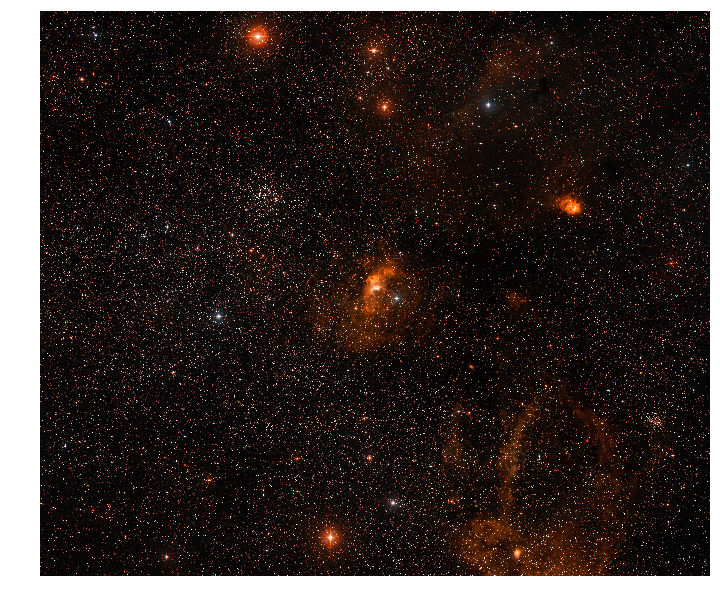

In [3]:
image_plot(img)

#### Paso 1.

1. Guarde `img` en un archivo `hdf5` en el formato que considere conveniente (puede utilizar _chunks_). Explique su elección. 
2. Elimine `img` de memoria principal.

#### Paso 2

1. Aplíque el siguiente filtro/kernel _sin overlap_ a cada canal de la imágen por separado:
```Python
K = 1/25. * np.ones((5,5))
```
2. No puede cargar `img` completamente en memoria. 
3. Realice `timeit` y `memit` del computo anterior.
4. Guarde la imágen resultante. ¿Que fue lo que se le hizo a la imágen original?

#### Paso 3
Muestre la imágen resultante con la función `image_plot()`.

In [4]:
f = h5py.File("act03.h5", "w")
nrows = img.shape[0]
ncols = img.shape[1]
dst = f.create_dataset("img",(nrows,ncols,img.shape[2]), dtype='uint8')

In [5]:
for i in range(img.shape[2]):
        tmp = img[:,:,i]
        dst[:,:,i] = tmp
        del tmp

In [6]:
del img

In [7]:
filter = 1/25. * np.ones((5,5))
dst2 = f.create_dataset("newImg",(nrows/5,ncols/5,3), dtype='uint8')

In [8]:
def apply_filter(data, nrows, ncols, kernel_filter, channel):
    
    x,y = -1,-1
    
    for i in range(2, nrows, 5):
        x+=1
        for j in range(2, ncols, 5):
            y+=1
            aux = data[i-2:i+3,j-2:j+3]
            dst2[x, y, channel] = np.sum(aux*kernel_filter)
        y = -1
    return None

In [9]:
%%memit
apply_filter(dst[:,:,0],nrows,ncols,filter,0)
apply_filter(dst[:,:,1],nrows,ncols,filter,1)
apply_filter(dst[:,:,2],nrows,ncols,filter,2)

peak memory: 173.37 MiB, increment: 84.74 MiB


In [12]:
%%timeit
apply_filter(dst[:,:,0],nrows,ncols,filter,0)
apply_filter(dst[:,:,1],nrows,ncols,filter,1)
apply_filter(dst[:,:,2],nrows,ncols,filter,2)

1 loop, best of 3: 22min 21s per loop


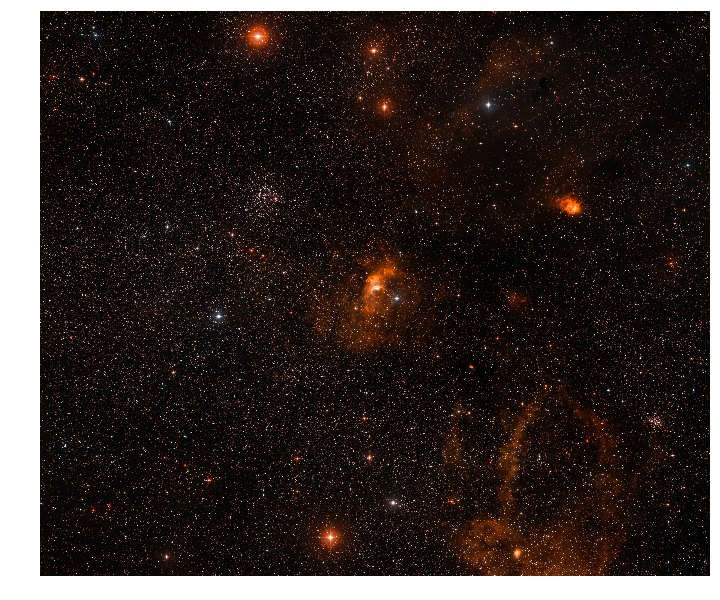

In [10]:
image_plot(dst2)